- Study Gini Index
- Compute the toy example using Gini Index
- Change criterion in the imported library, using Gini Index
- Compare Gini Index vs Entropy
- Use another dataset (data.csv)
- Play with parameters:
max_depth
min_samples_split
min_samples_leaf
- Explain your understanding after trying these different parameters


In [1]:
# Write your code here
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('toy_data.csv')
df

,age,income,student,credit rating,buys computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31-40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [3]:
#compute toy data using gini index
def gini_index(data, attribute):
    freq = data.groupby(attribute)[attribute].count() / len(data)
    gini = 1 - (freq**2).sum()
    return gini

gini_index(df, 'buys computer')

np.float64(0.4591836734693877)

In [4]:
def conditional_gini_index(data, attribute, target, return_gis = False):
    freq_target = data.groupby(target)[target].count() / len(data)
    gis = pd.Series(dict([(k, gini_index(data[data[target] == k], attribute)) for k in data[target].unique()]))
    if return_gis:
        return (freq_target * gis).sum(), gis
    return (freq_target * gis).sum()


conditional_gini_index(df, 'buys computer', 'age', return_gis = True)

(np.float64(0.34285714285714286),
 <=30     0.48
 31-40    0.00
 >40      0.48
 dtype: float64)

In [5]:
print("gini indices for each attribute")
pd.Series(dict([(k, conditional_gini_index(df, 'buys computer', k)) for k in df.columns]))

gini indices for each attribute


age              0.342857
income           0.440476
student          0.367347
credit rating    0.428571
buys computer    0.000000
dtype: float64

Create Dicision tree using gini index

In [6]:
def DecisionTree(df, target_attribute, features = []):
    if len(features) == 0:
        features = df.columns.values
        features = np.delete(features, np.where(features == target_attribute))
        
    tree = {}
    gis = pd.Series(dict([(k, conditional_gini_index(df, target_attribute, k)) for k in features]))
    
    best_attribute = gis.idxmin()
    tree[best_attribute] = {}
    for k in df[best_attribute].unique():
        tree[best_attribute][k] = {}
        subtable = df[df[best_attribute] == k].drop(best_attribute, axis = 1)
        if len(subtable[target_attribute].unique()) == 1:
            tree[best_attribute][k] = subtable[target_attribute].unique()[0]
        else:
            subtree = DecisionTree(subtable, target_attribute, features = np.delete(features, np.where(features == best_attribute)))
            tree[best_attribute][k] = subtree
    
    return tree

In [7]:
import json
print(json.dumps(DecisionTree(df, 'buys computer'), indent = 4))

{
    "age": {
        "<=30": {
            "student": {
                "no": "no",
                "yes": "yes"
            }
        },
        "31-40": "yes",
        ">40": {
            "credit rating": {
                "fair": "yes",
                "excellent": "no"
            }
        }
    }
}


Using sklean (entropy)

In [8]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
def encode_data(df):
    le = LabelEncoder()
    for col in df.columns:
        df[col] = le.fit_transform(df[col])
    return df

df = encode_data(df)

In [22]:
def fit_decision_tree(df, target_attribute, criterion = 'entropy', max_depth = None, min_samples_split = 2, min_samples_leaf = 1):
    X = df.drop(target_attribute, axis = 1)
    y = df[target_attribute]
    
    clf = DecisionTreeClassifier(
        criterion = criterion, random_state = 42,
        max_depth = max_depth,
        min_samples_split = min_samples_split,
        min_samples_leaf = min_samples_leaf
    )
    clf.fit(X, y)
    return clf

In [11]:
def find_performance(y_test, y_pred):
    accuracy= accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    
    print("classification report:")
    print(classification_report(y_test, y_pred))
    
    print("confusion matrix:")
    print(confusion_matrix(y_test, y_pred))

In [12]:
def plot_decision_tree(clf, features, target_attribute):
    plt.figure(figsize=(12,10))
    plot_tree(clf, filled=True, feature_names=features, class_names=['no', 'yes'], rounded=True)
    plt.show()

Put them all together version

Accuracy: 1.00
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

confusion matrix: 
[[1 0]
 [0 2]]


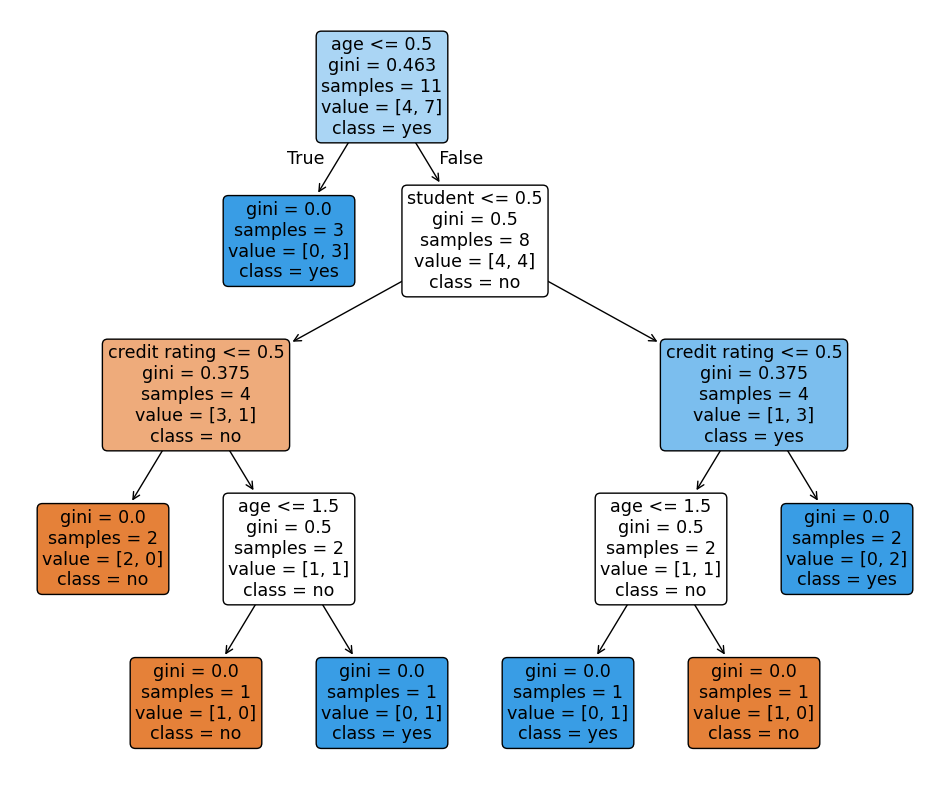

In [15]:
df = pd.read_csv('toy_data.csv')

#encode data
df = encode_data(df)

#seperate features and target
X = df.drop('buys computer', axis = 1)
y = df['buys computer']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fit decision tree
clf = DecisionTreeClassifier(criterion='gini', random_state = 42)

#fit the model
clf.fit(X_train, y_train)

#predict
y_pred = clf.predict(X_test)

#find performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

#classification report
print("classification report: ")
print(classification_report(y_test, y_pred))

#confusion matrix
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

#plot decision tree
plt.figure(figsize=(12,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True)
plt.show()

new Dataset

Entropy Version

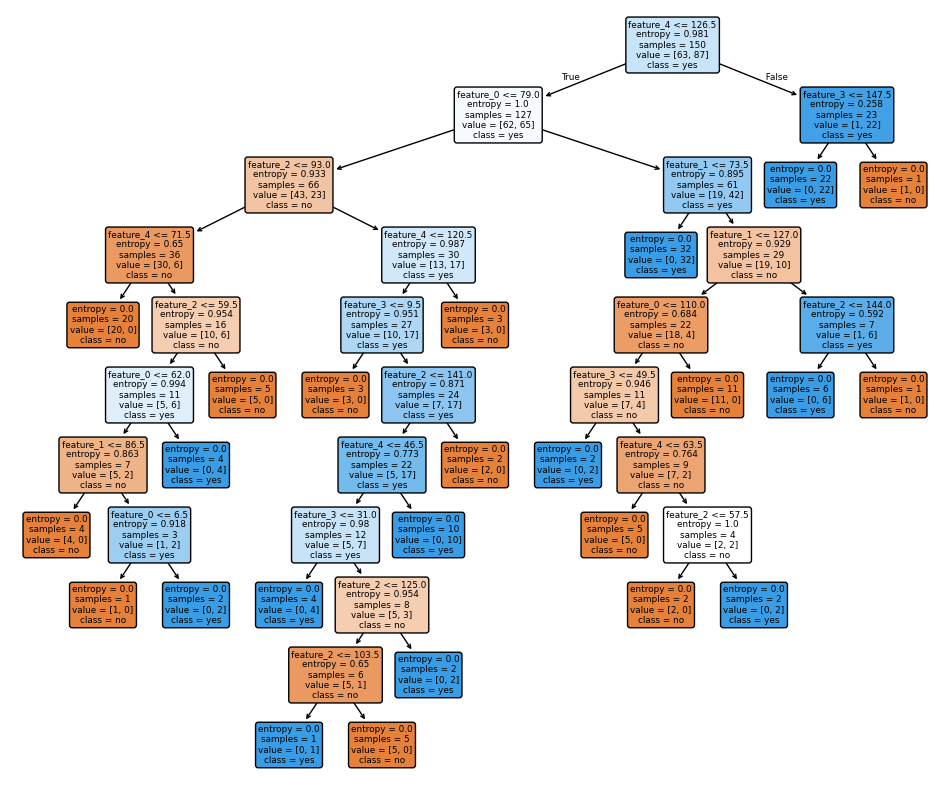

In [27]:
df = pd.read_csv('dataset.csv')

#Create entropy tree

#encode data
df = encode_data(df)

#seperate features and target
X = df.drop('target', axis = 1)
y = df['target']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fit decision tree
clf = fit_decision_tree(df, 'target', criterion = 'entropy')

plot_decision_tree(clf, X.columns, 'target')

In [28]:
# evaluate the model
y_pred = clf.predict(X_test)

find_performance(y_test, y_pred)

Accuracy: 1.00
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        18

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion matrix:
[[12  0]
 [ 0 18]]


gini index

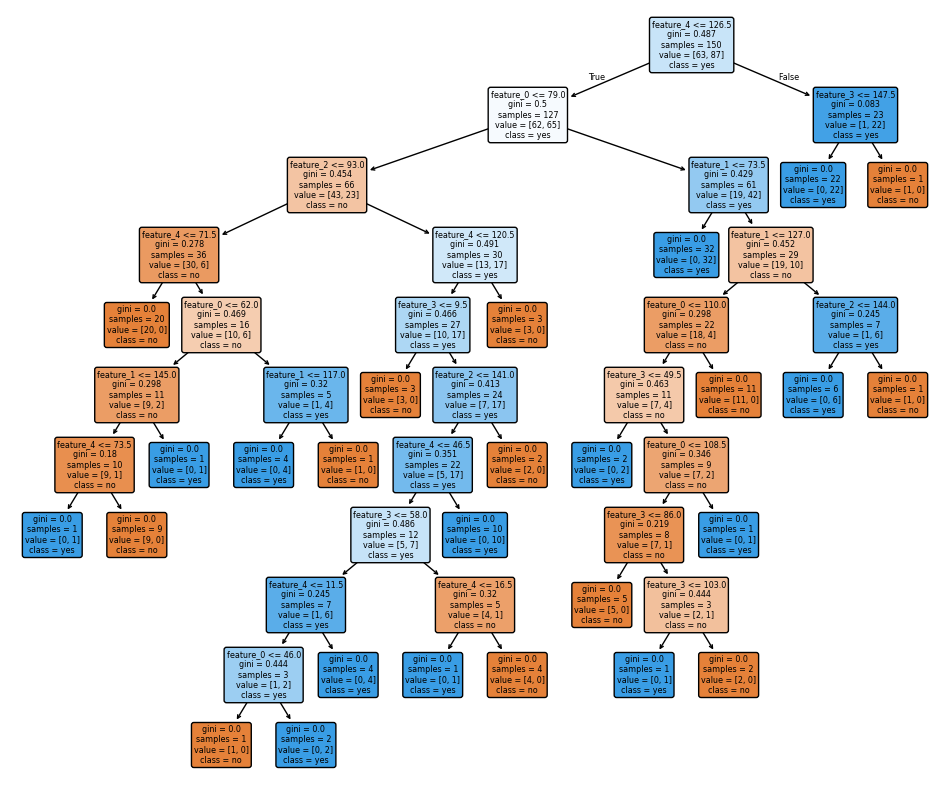

In [29]:
# Create gini tree

#fit decision tree
clf = fit_decision_tree(df, 'target', criterion = 'gini')

plot_decision_tree(clf, X.columns, 'target')

In [30]:
# evaluate the model

y_pred = clf.predict(X_test)

find_performance(y_test, y_pred)

Accuracy: 1.00
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        18

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

confusion matrix:
[[12  0]
 [ 0 18]]


Playing with Parameters

max_depth

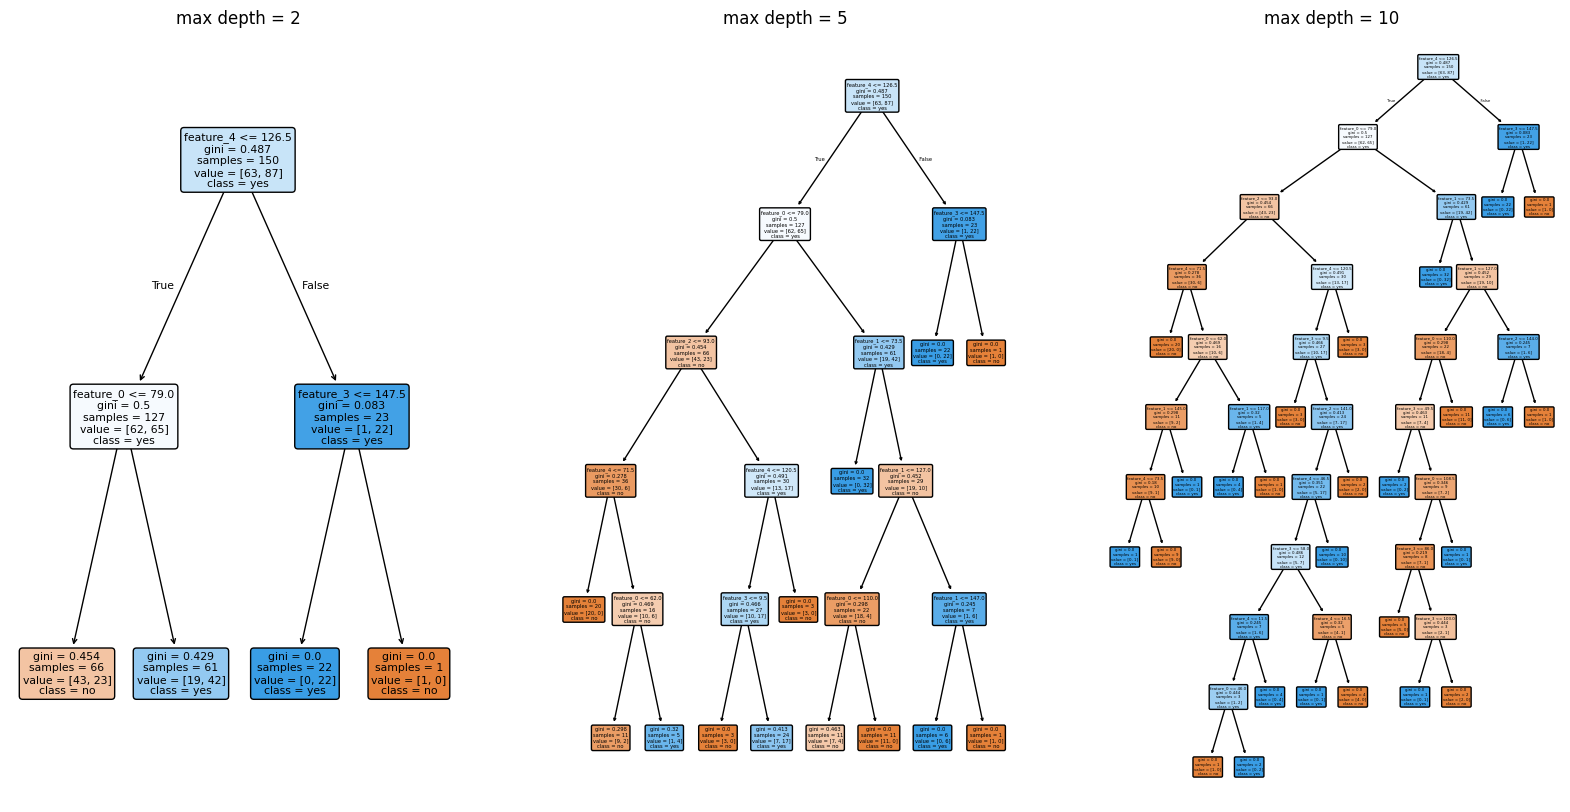

In [32]:
# Create gini tree with max depth

fig , ax = plt.subplots(1, 3, figsize=(20, 10))

max_depths = [2, 5, 10]

for md, ax in zip(max_depths, ax):
    clf = fit_decision_tree(df, 'target', criterion = 'gini', max_depth = md)
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True, ax=ax)
    ax.set_title(f"max depth = {md}")
    
plt.show()

min_samples_split

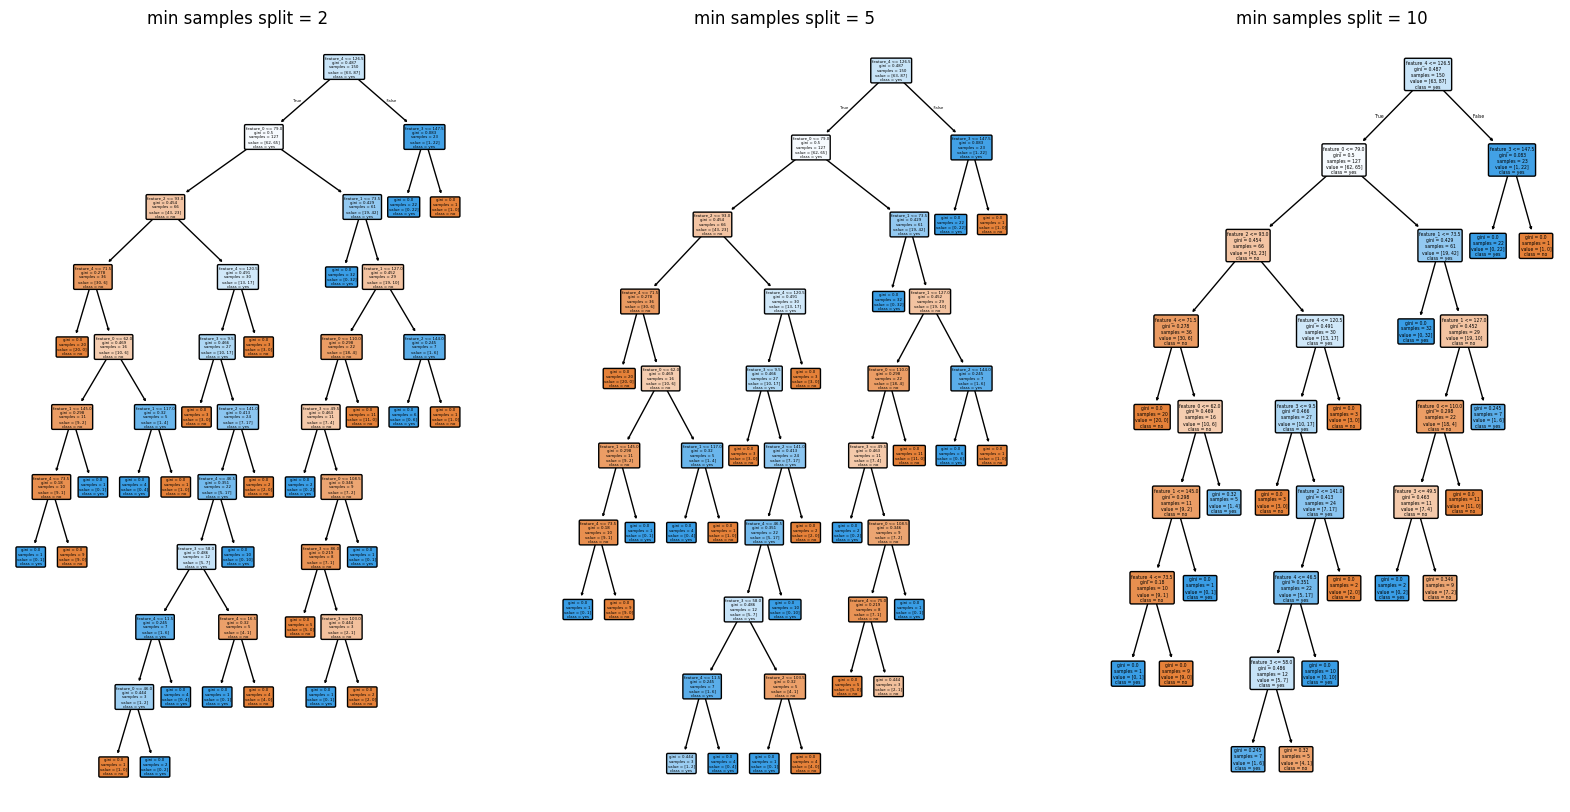

In [33]:
# create gini tree with min samples split

fig , ax = plt.subplots(1, 3, figsize=(20, 10))

min_samples_splits = [2, 5, 10]

for mss, ax in zip(min_samples_splits, ax):
    clf = fit_decision_tree(df, 'target', criterion = 'gini', min_samples_split = mss)
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True, ax=ax)
    ax.set_title(f"min samples split = {mss}")
    
plt.show()

min_samples_leaf

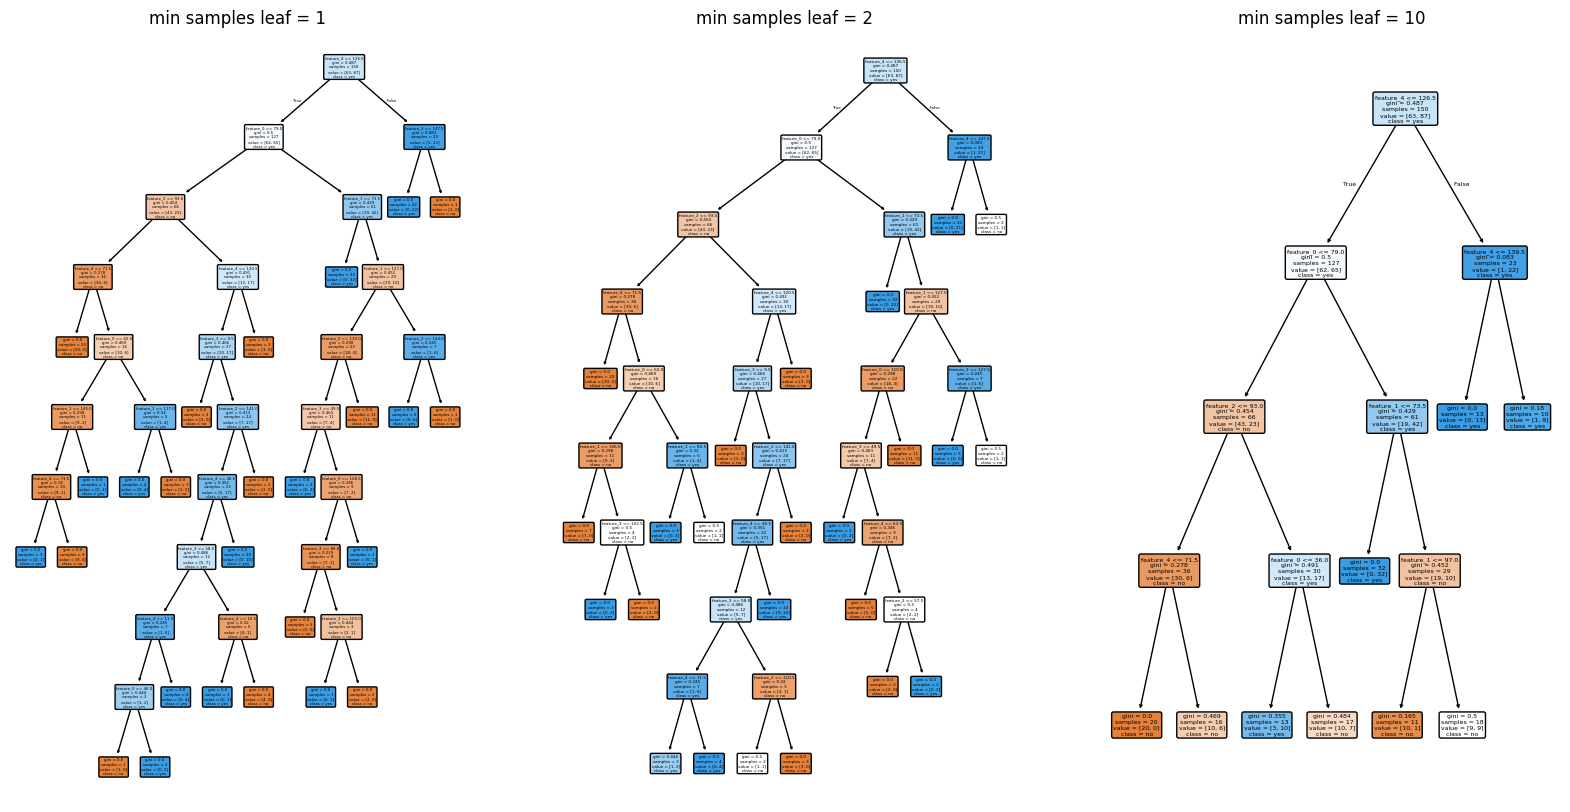

In [35]:
# create gini tree with min samples leaf

fig , ax = plt.subplots(1, 3, figsize=(20, 10))

min_samples_leafs = [1, 2, 10]

for msl, ax in zip(min_samples_leafs, ax):
    clf = fit_decision_tree(df, 'target', criterion = 'gini', min_samples_leaf = msl)
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'], rounded=True, ax=ax)
    ax.set_title(f"min samples leaf = {msl}")

plt.show()

Conclusion
Gini index VS Entropy
Gini and Entropy are both impurity measures used in decision trees to determine the best attribute for splitting data. While Entropy quantifies impurity directly, Gini is computationally more efficient, making it the default criterion in sklearn's DecisionTreeClassifier. Entropy is preferable when constructing multiway trees, whereas Gini is more suitable for creating balanced trees.

Parameters
max_depth, min_samples_split, and min_samples_leaf help prevent overfitting and fine-tune the model to achieve optimal performance. Proper tuning of these parameters ensures a well-generalized decision tree.